# Discussion 4

## **Classifiers**

### Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of P(X|Y). 

Below is an implementation for Gaussian Bayes.

In [2]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print(gnb.score(X,y))


Number of mislabeled points out of a total 75 points : 4
0.96


### Logistic Regression 

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# default max iterations is 100, this dataset failed to converge in 100 iterations, so I increased the max iterations
clf = LogisticRegression(random_state=0, max_iter=300).fit(X, y)
print(clf.score(X, y))

0.96


/Users/alyssakeehan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alyssakeehan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## **Clustering**

## K-Means

[[-1.50821073  9.13150419]
 [-3.10729437  8.55299662]
 [ 3.08321371  8.93677353]
 ...
 [-3.92043244 11.2608147 ]
 [ 3.29177309  8.03231806]
 [-2.2438612   9.01820311]]


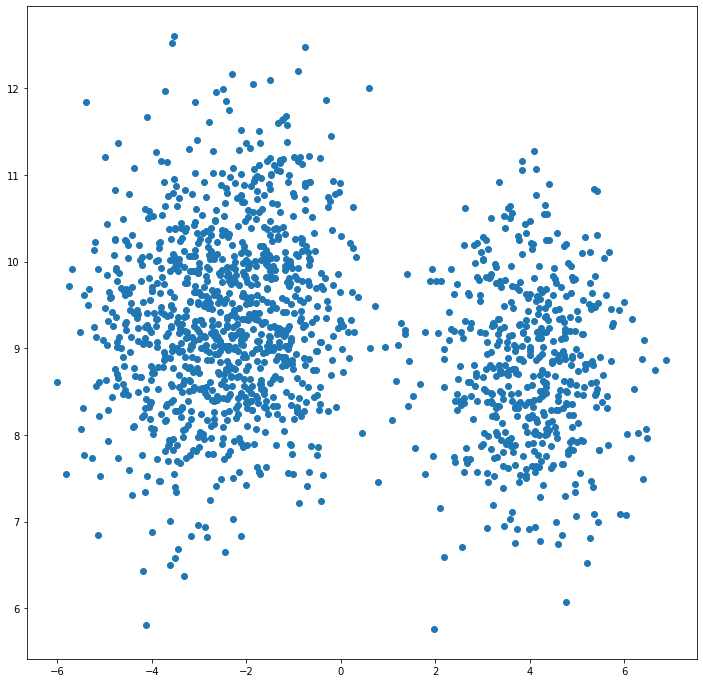

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Taken from SKLearn
# Generates random clusters of points
plt.figure(figsize=(12, 12))
n_samples = 1500
X, y = make_blobs(n_samples=n_samples) 
plt.scatter(X[:, 0], X[:, 1])


The K-means algorithm requires the clusters to be specified beforehand. If the number specified is more or less than the actual number of clusters, we can see that our model does not accurately represent the data.

Text(0.5, 1.0, 'Incorrect Number of Blobs')

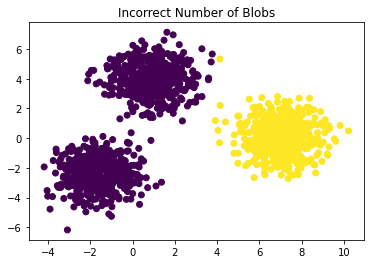

In [ ]:
random_state = 189
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")


Text(0.5, 1.0, 'Incorrect Number of Blobs')

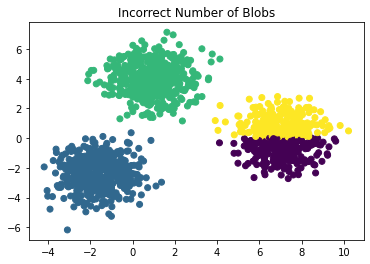

In [ ]:
y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

K-Means also makes the assumption that clusters are convex and isotropic, which is not always the case.

I.E. Clusters which are separable and equally wide and high (like the above clusters).

make_blobs will always generate isotropic Gaussian blobs, so we have to transform the data into something that is not isotropic to show the next example.

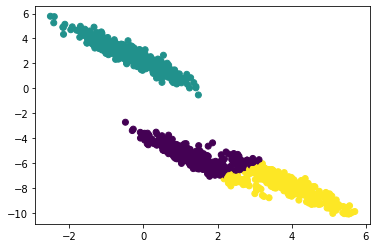

In [ ]:
random_state = 145
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_transform = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_transform)
plt.scatter(X_transform[:, 0], X_transform[:, 1], c=y_pred)